In [45]:
#Basic libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

#Sampling methods
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

#feature engineering
import datetime as dt
! pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
#from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

#Hyperparameter tuning
#from skopt import gp_minimize

#Model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics
import scipy.stats as stats
from scipy.stats import skew

## Importing Data

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
train = pd.read_csv("/content/drive/MyDrive/ML_CCT_datasets/fraudTrain.csv", index_col=0)

#train = pd.read_csv("fraudTrain.csv", index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

## Data Cleansing

In [48]:
train.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.38,-75.20,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65,-76.15,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.99,-100.99,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.16,-100.15,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.84,-78.60,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.95,-78.54,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.34,-79.66,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.35,-79.96,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.52,-87.35,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.18,-87.49,0


**Information on Training set for Credit Card Transactions**
1. **index** - Unique Identifier for each row
2. **trans_date_trans_time** - Transaction DateTime
3. **cc_num** - Credit Card Number of Customer
4. **merchant** - Merchant Name
5. **category** - Category of Merchant
6. **amt** - Amount of Transaction
7. **first** - First Name of Credit Card Holder
8. **last** - Last Name of Credit Card Holder
9. **gender** - Gender of Credit Card Holder
10. **street** - Street Address of Credit Card Holder
11. **city** - City of Credit Card Holder
12. **state** - State of Credit Card Holder
13. **zip** - Zip of Credit Card Holder
14. **lat** - Latitude Location of Credit Card Holder
15. **long** - Longitude Location of Credit Card Holder
16. **city_pop** - Credit Card Holder's City Population
17. **job** - Job of Credit Card Holder
18. **dob** - Date of Birth of Credit Card Holder
19. **trans_num** - Transaction Number
20. **unix_time** - UNIX Time of transaction
21. **merch_lat** - Latitude Location of Merchant
22. **merch_long** - Longitude Location of Merchant
23. **is_fraud** - Fraud Flag <--- Target Class

In [49]:
train.shape

(1296675, 22)

<Axes: >

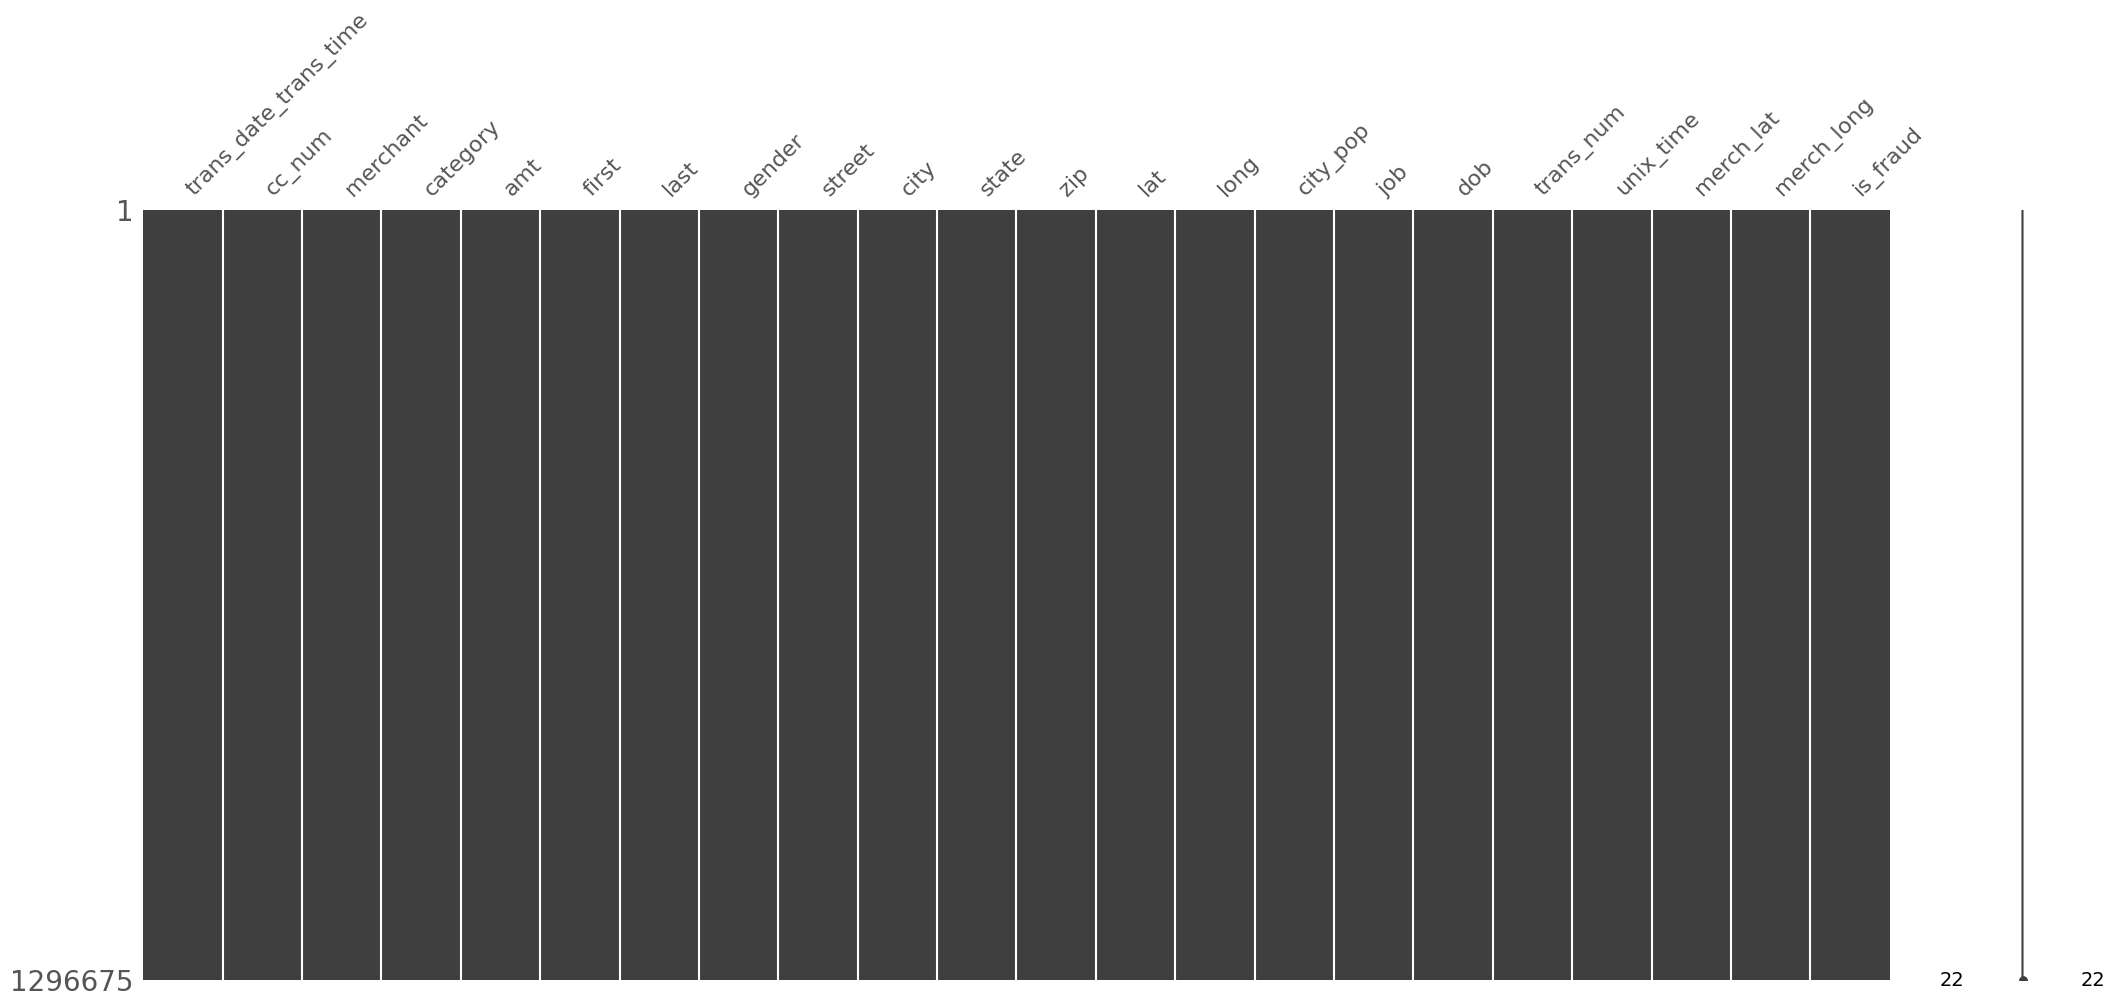

In [50]:
msno.matrix(train)

**Observation**: No missing values

In [51]:
train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Exploratory Data Analysis (EDA)

In [52]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,"1,296,675.00","417,192,042,079,726,656.00","1,308,806,447,000,240,384.00","60,416,207,185.00","180,042,946,491,150.00","3,521,417,320,836,166.00","4,642,255,475,285,942.00","4,992,346,398,065,154,048.00"
amt,"1,296,675.00",70.35,160.32,1.00,9.65,47.52,83.14,"28,948.90"
zip,"1,296,675.00","48,800.67","26,893.22","1,257.00","26,237.00","48,174.00","72,042.00","99,783.00"
lat,"1,296,675.00",38.54,5.08,20.03,34.62,39.35,41.94,66.69
long,"1,296,675.00",-90.23,13.76,-165.67,-96.80,-87.48,-80.16,-67.95
city_pop,"1,296,675.00","88,824.44","301,956.36",23.00,743.00,"2,456.00","20,328.00","2,906,700.00"
unix_time,"1,296,675.00","1,349,243,636.73","12,841,278.42","1,325,376,018.00","1,338,750,742.50","1,349,249,747.00","1,359,385,375.50","1,371,816,817.00"
merch_lat,"1,296,675.00",38.54,5.11,19.03,34.73,39.37,41.96,67.51
merch_long,"1,296,675.00",-90.23,13.77,-166.67,-96.90,-87.44,-80.24,-66.95
is_fraud,"1,296,675.00",0.01,0.08,0.00,0.00,0.00,0.00,1.00


<Axes: >

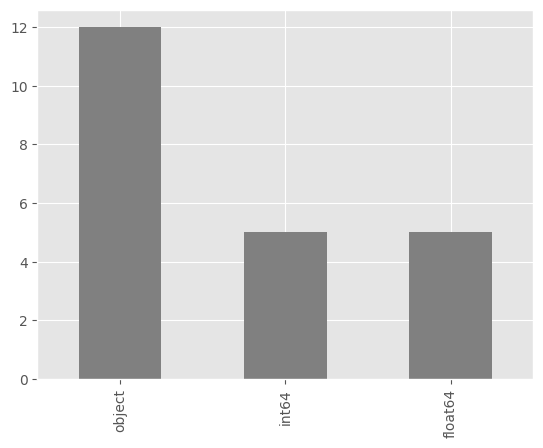

In [53]:
train.dtypes.value_counts().plot(kind='bar', color="grey")

**Observation**: There are a lot of categorical features which will require categorical encoding.

### Univariate analysis

Univariate analysis is the simplest of the analyses where the data is analyzed using only one variable.

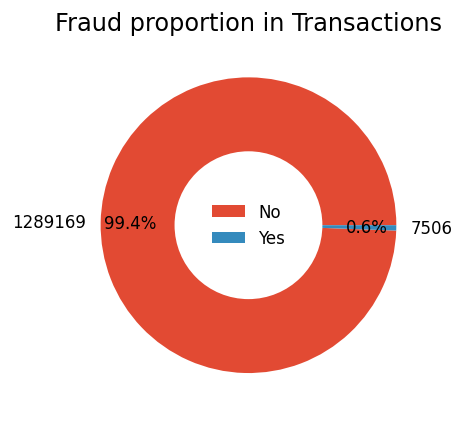

In [54]:
donut = train["is_fraud"].value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["is_fraud"],
        labels=donut["is_fraud"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fraud proportion in Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show();

**Observation**: The dataset is highly imbalanced due to which Oversampling/Undersampling techniques have to implemented while model training.

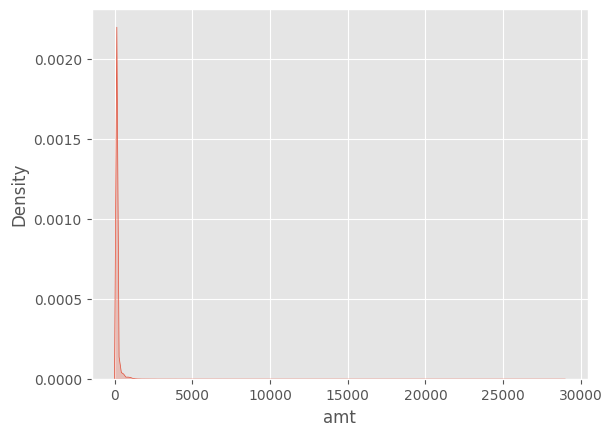

In [55]:
# checking distribution of amount feature
sns.kdeplot(train["amt"], fill=True);

**Observation**: Since higher values of amount is distorting the graph.

In [56]:
train["amt"].describe()

count   1,296,675.00
mean           70.35
std           160.32
min             1.00
25%             9.65
50%            47.52
75%            83.14
max        28,948.90
Name: amt, dtype: float64

**Observation**: The value at 75th percentile is only 83. Plotting only 0-99% of the amount might give better insights.

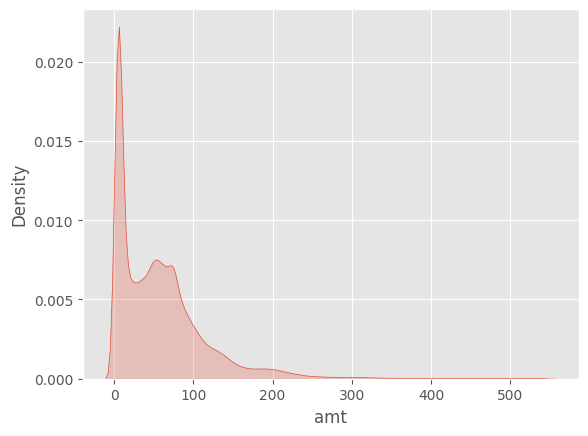

In [57]:
p99 = train["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=train[train["amt"] <= p99], fill=True);

### Multivariate Analysis

Multivariate Analysis is when you are comparing more than two variables for data analysis.

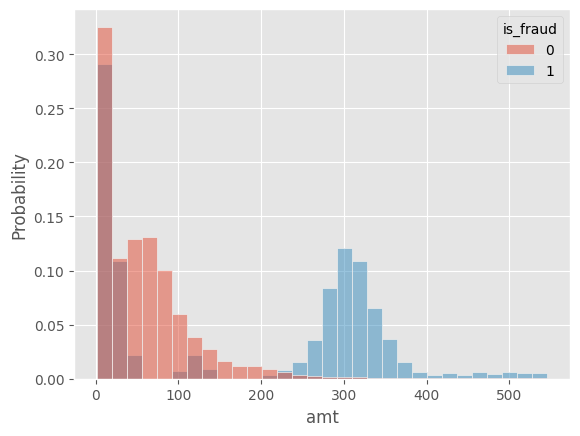

In [58]:
p99 = train["amt"].quantile(0.99)
sns.histplot(x="amt", hue="is_fraud", bins=30,
             stat="probability", data=train[train["amt"] <= p99],
             common_norm=False);

**Observation**: The probability distribution behaves differently for each value of "is_fraud".

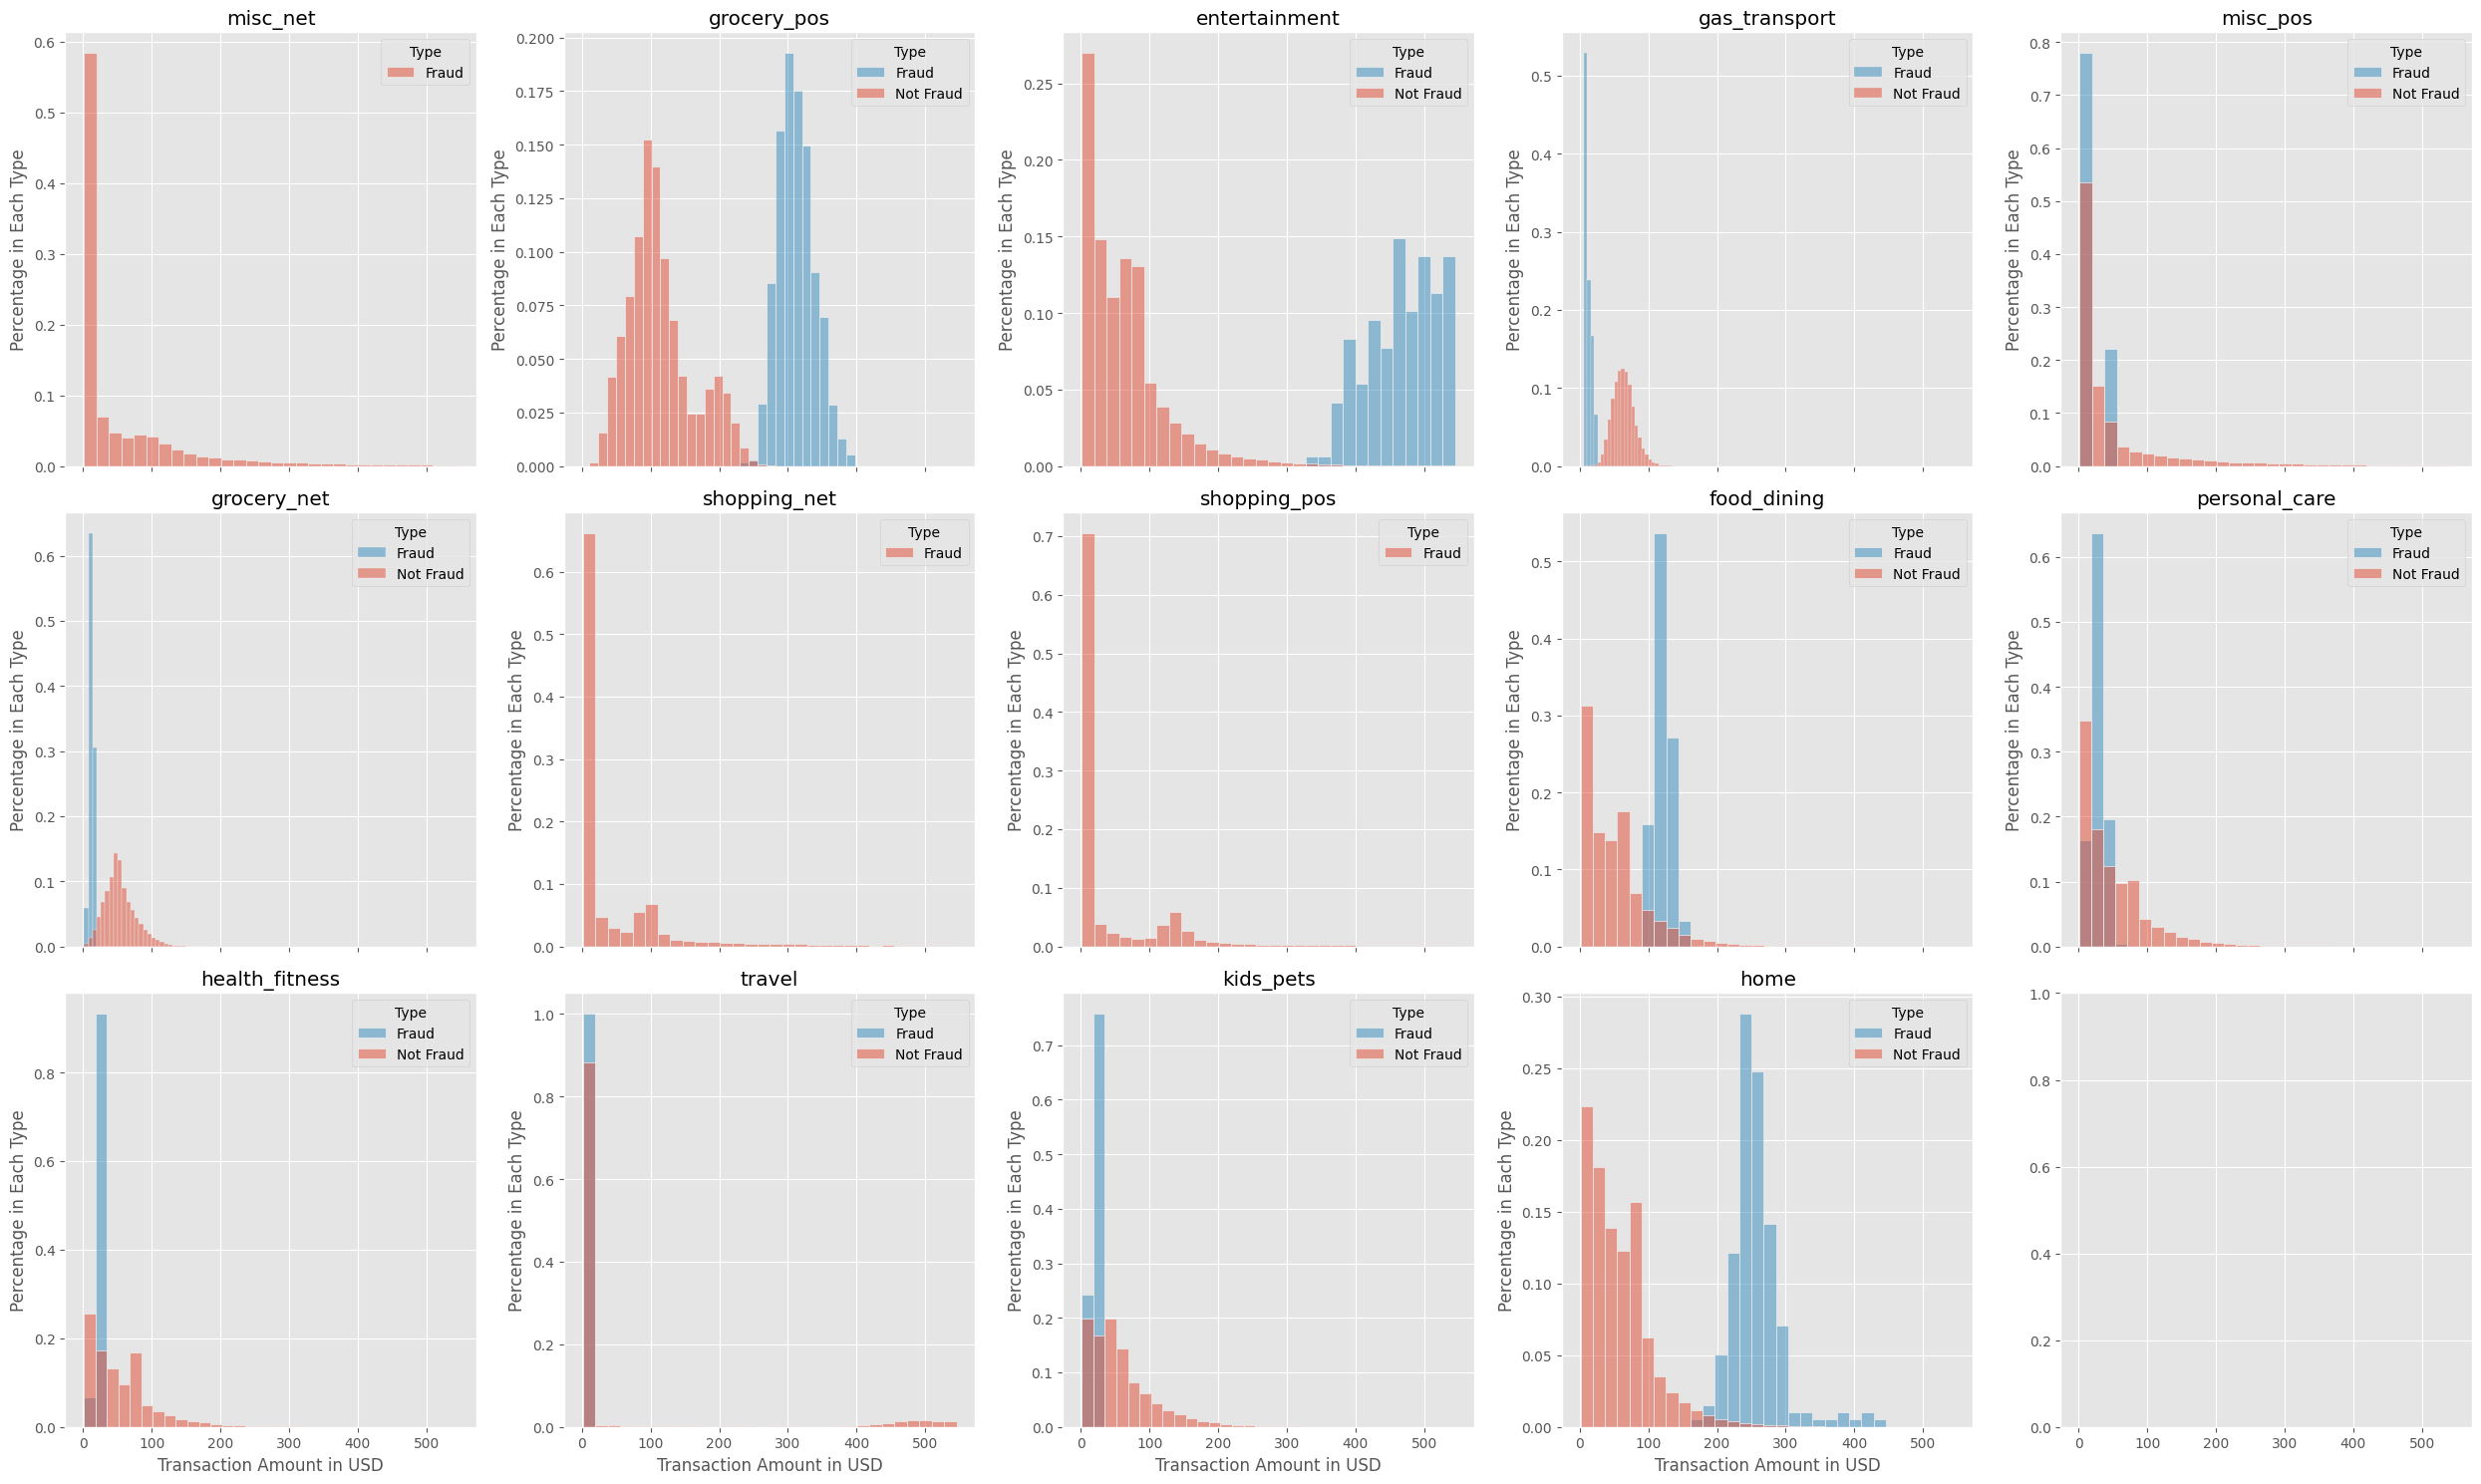

In [59]:
# Analysis of percentage of fraud and non-fraud transacation in each category

categories = train['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for i, category in enumerate(categories):

    row = i // num_cols
    col = i % num_cols

    data_category = train[train['category'] == category]

    if num_rows == 1 and num_cols == 1:
        ax = axes
    elif num_rows == 1 or num_cols == 1:
        ax = axes[i]
    else:
        ax = axes[row, col]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= p99],
            hue='is_fraud', stat='probability',
            common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()

plt.show();

### Calculating Fraud Level

Calculate the distribution for each category for normal transactions and then the distribution for fraudulents transactions. Then, take the difference between the two distributions. This difference shows the categories that are most predominants to have frauds.



In [60]:
# non_fraud
non_fraud = train[train['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentage_vs_total']

# fraud
fraud = train[train['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentage_vs_total']

non_fraud_vs_fraud

,category,not_fraud_percentage_vs_total,fraud_percentage_vs_total,fraud_level
0,gas_transport,0.10,0.08,-0.02
1,home,0.10,0.03,-0.07
2,grocery_pos,0.09,0.23,0.14
3,shopping_pos,0.09,0.11,0.02
4,kids_pets,0.09,0.03,-0.06
5,shopping_net,0.07,0.23,0.15
6,entertainment,0.07,0.03,-0.04
7,food_dining,0.07,0.02,-0.05
8,personal_care,0.07,0.03,-0.04
9,health_fitness,0.07,0.02,-0.05


**Observation**: "not_fraud_percentage_vs_total" and "fraud_percentage_vs_total" sums up to 1. That's because we are taking the percentual of each category on total, for fraud and not fraud, and calculating the "fraud_level" metric, that shows which category is more common to have frauds.

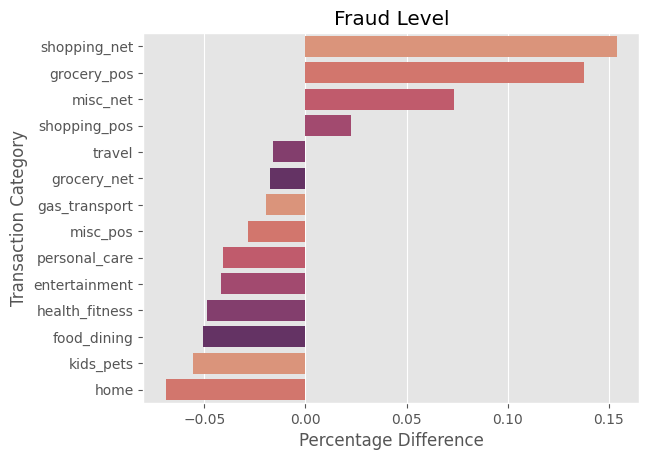

In [61]:
custom_palette = sns.color_palette("flare")
ax = sns.barplot(y='category', x='fraud_level',
                 data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Fraud Level');

**Obseravtion**: The following categories are more propicious to have frauds:
1. shopping_net
2. grocery_pos
3. misc_net
4. shopping_pos

### Impact of Age on Fraudulant Transactions

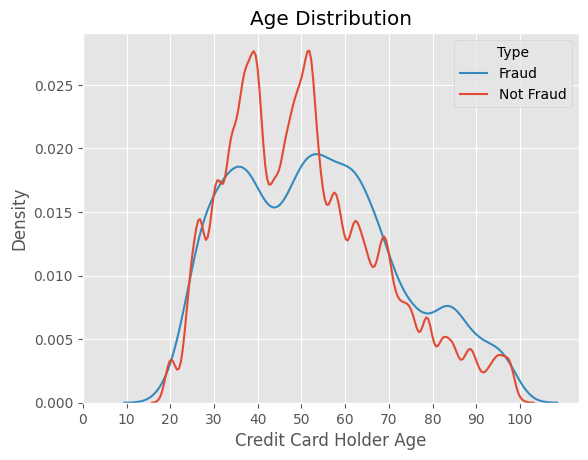

In [62]:
train['age'] = dt.date.today().year-pd.to_datetime(train['dob']).dt.year
ax = sns.kdeplot(x='age', data=train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

**Observation**: In *non-fraudulent* transactions, there is a peak around 35 - 40 years, and another one around 50 years. On the other hand, In *fraudulent* operations, we observe a smoother distribution, with peaks around 35 years and in the range of 50 - 55 years.

### Impact of Time of Day on Fraudulant Transactions

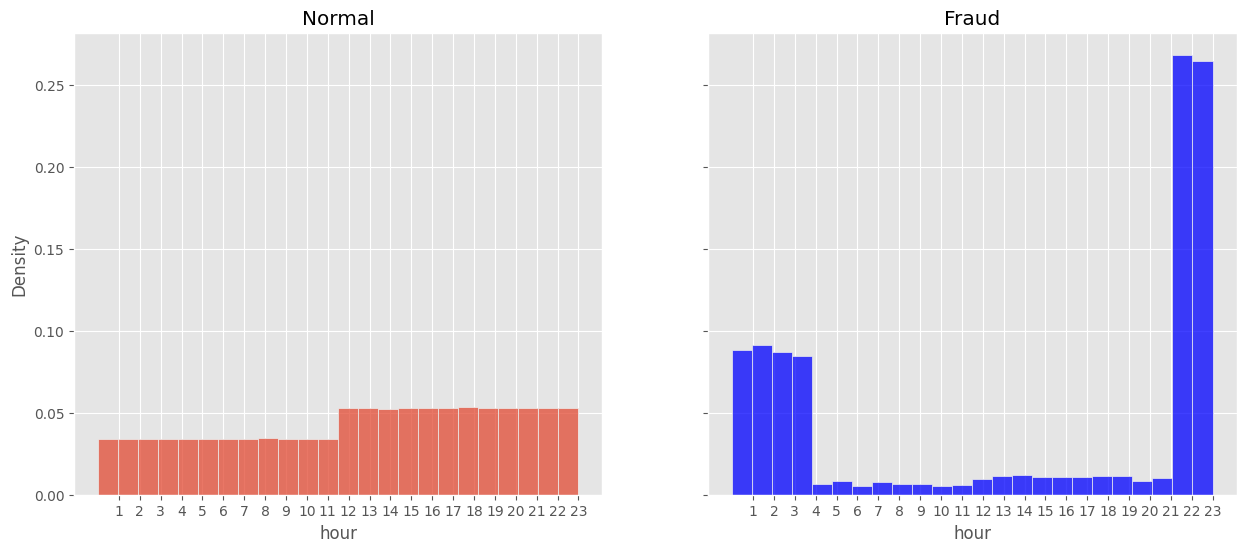

In [63]:
train['hour'] = pd.to_datetime(train['trans_date_trans_time']).dt.hour
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=train[train["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)
ax2 = sns.histplot(x='hour', data=train[train["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

**Observation**: There is a clear pattern when it comes to hour in the day. Fraudulent payments happens more frequently around midnight than in normal transactions.

### Impact of Month on Fraudulant Transactions

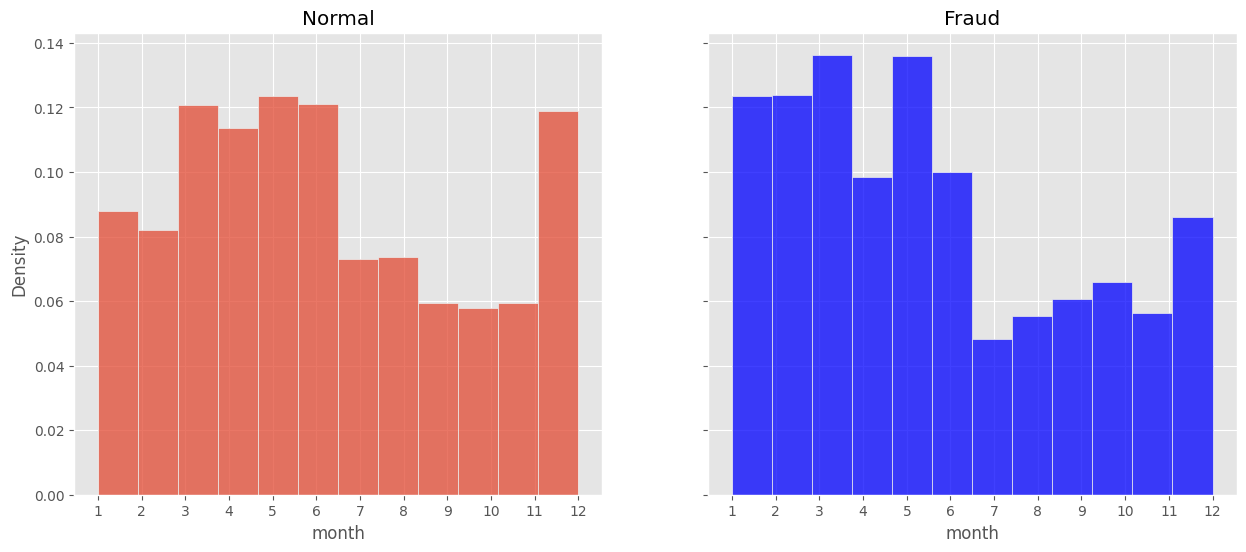

In [64]:
train['month'] = pd.to_datetime(train['trans_date_trans_time']).dt.month
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='month', data=train[train["is_fraud"] == 0],
                   stat="density", bins=12, ax=ax1)
ax2 = sns.histplot(x='month', data=train[train["is_fraud"] == 1],
                   stat="density", bins=12, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13));

## Feature Engineering

Feature Engineering is the process of extracting and organizing the important features from raw data in such a way that it fits the purpose of the machine learning model. It can be thought of as the art of selecting the important features and transforming them into refined and meaningful features that suit the needs of the model.

In [65]:
# drop columns that do not have useful information

train.drop(columns=["merchant", "first", "last", "street",
           "unix_time", "trans_num"], inplace=True)

In [66]:
train.head(2)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age,hour,month
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,36.01,-82.05,0,36,0,1
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,49.16,-118.19,0,46,0,1


### Scaling


**Type of Scaling Used**: Logarithmic scaling (**log1p**)

**Reason**: "amt" category has very little spacing between small numbers and large spacing between high numbers. This algorithm increases the distance between small values and reduces de spacing between large ones.

The importance of log1p is that the function log(1 + 𝑥) is well-conditioned near zero, and often turns up in numerical algorithms or algebraic rearrangements of other functions.

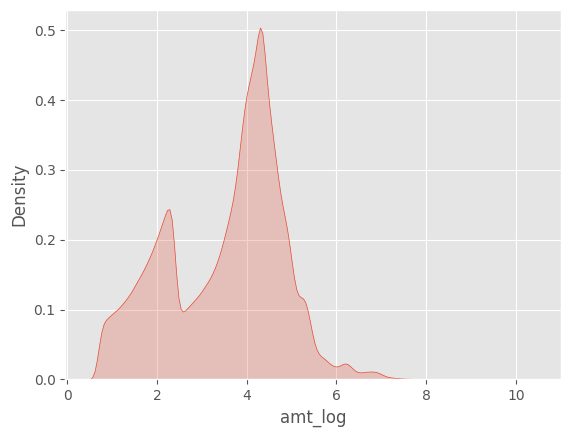

In [67]:
train["amt_log"] = np.log1p(train["amt"])
sns.kdeplot(train["amt_log"], fill=True);

In [68]:
# function to check normality before and after scaling
def check_normality(feature):
    plt.figure(figsize=(4, 4))
    ax1 = plt.subplot(1, 1, 1)
    stats.probplot(train[feature], dist=stats.norm, plot=ax1)
    ax1.set_title(f'{feature} Q-Q plot', fontsize=15)
    sns.despine()

    mean = train[feature].mean()
    std = train[feature].std()
    skew = train[feature].skew()
    print(f'{feature} : mean: {mean:.2f}, std: {std:.2f}, skew: {skew:.2f}')

amt : mean: 70.35, std: 160.32, skew: 42.28


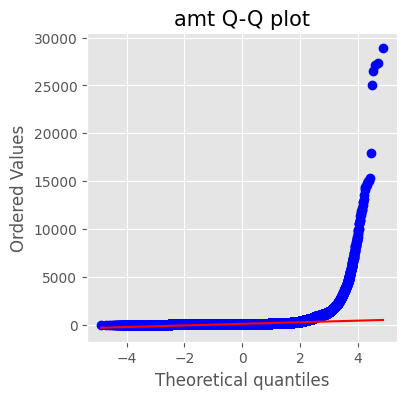

In [69]:
check_normality("amt");

amt_log : mean: 3.53, std: 1.29, skew: -0.30


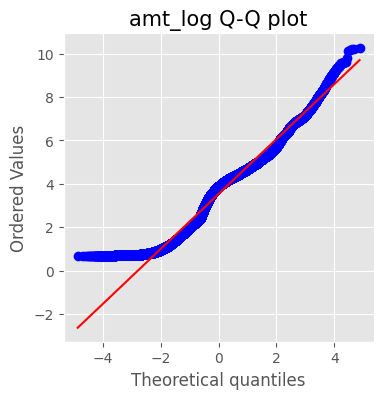

In [70]:
check_normality("amt_log");

**Observation**: With logrithmic scaling, skewness improved a lot.

**Skewness** is a statistical term and it is a way to estimate or measure the shape of a distributionused to estimate the asymmetrical behavioral. A skewness value greater than zero means that there is more weight in the right tail of the distribution

### Categorical Encoding

**Encoder Used**: WOE - **Weight of Evidence**

Weight of Evidence (WOE) quantifies the strength of the relationship between a categorical independent variable (predictor) and a binary target variable (response) by calculating the logarithm of the odds ratio.

The WoE value quantifies the relationship between a category and the target variable. It measures how well the category predicts the positive (1) or negative (0) class of the target variable.

- If WOE>0, it indicates that the category is associated with a higher likelihood of the positive event (good outcome).
- If WOE<0, it indicates that the category is associated with a higher likelihood of the negative event (bad outcome).
- If WOE=0, it suggests that the category has no discriminatory power between the positive and negative events.

In [71]:
def apply_woe(train, columns, target_col):
    woe = ce.WOEEncoder()

    for col in columns:
        X = train[col]
        y = train[target_col]

        new_col_name = f"{col}_WOE"
        train[new_col_name] = woe.fit_transform(X, y)

    return train

In [72]:
columns_to_encode = ["category", "state", "city", "job"]
target_column = "is_fraud"

train = apply_woe(train, columns_to_encode, target_column)

In [73]:
# gender category encoded by dummies
gender_mapping = {"F": 0, "M": 1}
train["gender_binary"] = train["gender"].map(gender_mapping)

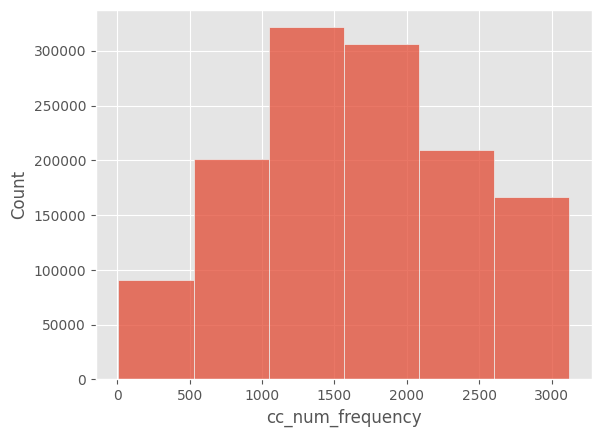

In [74]:
# encoding the cc_num (credit card number) by dividing into classes based on frequency
freq_enc = (train.groupby("cc_num").size())
freq_enc.sort_values(ascending=True)
train["cc_num_frequency"] = train["cc_num"].apply(lambda x: freq_enc[x])

sns.histplot(train["cc_num_frequency"], bins=6);

In [75]:
intervals = [600, 1200, 1800, 2400, 3000, 3600]

def classify_frequency(freq):
    for i, c in enumerate(intervals):
        if freq <= c:
            return i

train["cc_num_frequency_classification"] = train["cc_num_frequency"].apply(
    classify_frequency)

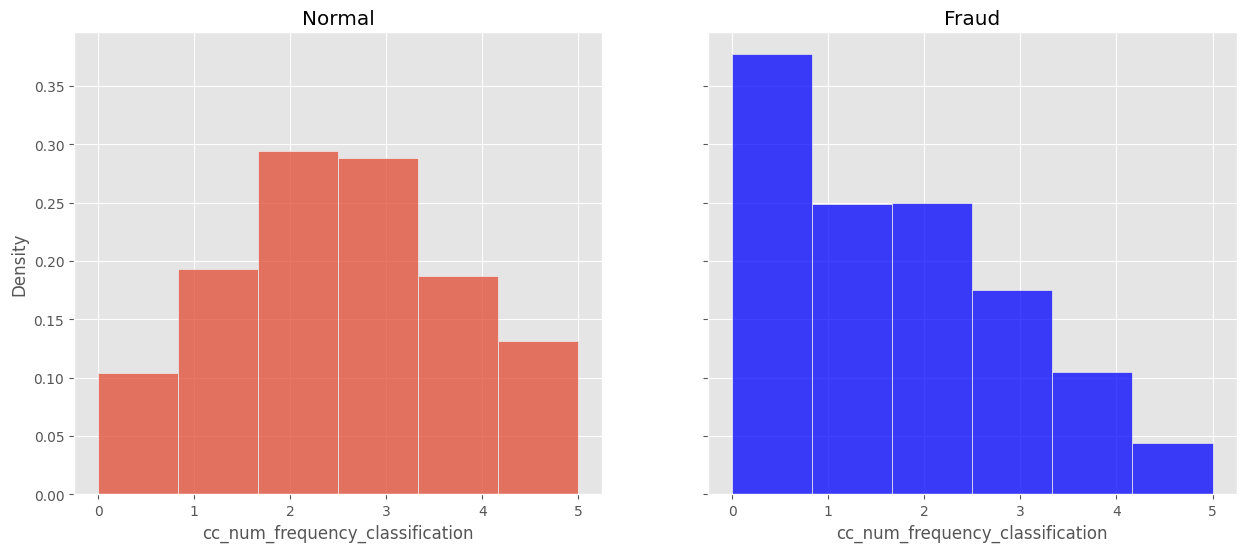

In [76]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='cc_num_frequency_classification', data=train[train["is_fraud"] == 0],
                   stat="density", bins=6, ax=ax1)
ax2 = sns.histplot(x='cc_num_frequency_classification', data=train[train["is_fraud"] == 1],
                   stat="density", bins=6, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud");

In [77]:
train.head()

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age,hour,month,amt_log,category_WOE,state_WOE,city_WOE,job_WOE,gender_binary,cc_num_frequency,cc_num_frequency_classification
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,36.01,-82.05,0,36,0,1,1.79,0.92,-0.16,-2.47,-1.08,0,2028,3
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,49.16,-118.19,0,46,0,1,4.68,0.90,-0.12,-3.03,-0.90,0,3030,5
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,43.15,-112.15,0,62,0,1,5.40,-0.85,-0.99,-1.08,1.12,1,503,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,47.03,-112.56,0,57,0,1,3.83,-0.21,-0.73,1.75,0.36,1,493,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,38.67,-78.63,0,38,0,1,3.76,-0.61,0.16,-2.46,-2.46,1,2017,3


In [79]:
train.to_csv('fraudTrainPreprocessed.csv')
!cp fraudTrainPreprocessed.csv /content/drive/MyDrive/ML_CCT_datasets

## Preparing Test Data

In [80]:
test = pd.read_csv("fraudTest.csv", index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

In [82]:
test['age'] = dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['month'] = pd.to_datetime(test['trans_date_trans_time']).dt.month

test.drop(columns=["merchant", "first", "last", "street",
                   "unix_time", "trans_num"], inplace=True)

test["amt_log"] = np.log1p(test["amt"])

test = apply_woe(test, columns_to_encode, target_column)

test["gender_binary"] = test["gender"].map(gender_mapping)

freq_enc_test = (test.groupby("cc_num").size())
freq_enc_test.sort_values(ascending=True)
test["cc_num_frequency"] = test["cc_num"].apply(lambda x: freq_enc_test[x])
test["cc_num_frequency_classification"] = test["cc_num_frequency"].apply(
    classify_frequency)


In [83]:
test.to_csv('fraudTestPreprocessed.csv')
!cp fraudTestPreprocessed.csv /content/drive/MyDrive/ML_CCT_datasets/